In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will find numerical solutions of the constant velocity advection problem with the rancic method

In [88]:
# Parameters
dt = 1
v = 1.23 # advection speed
T = 1000

In [83]:
x_coordinates = np.array([x for x in range(-50, 51)])
initial_distribution = np.exp(-((x_coordinates)/10)**2)

# plt.plot(x_coordinates, initial_distribution)
# plt.show()

In [89]:
grid = np.zeros((T, len(x_coordinates))) # rows are time steps, columns are x coordinates
grid[0, :] = initial_distribution

# Main Algorithm

In [85]:
# velocity interpolator
def velocity_interp(timestep, shift): # TO DO LATER
    vel_mat = np.zeros((1, len(x_coordinates)))
    vel_mat += v
    return np.roll(vel_mat, int(shift))

# finite difference differentiator 
def shifted_diff(timestep, shift):
    diff_mat = (np.roll(grid[timestep, :], int(shift - 1)) - np.roll(grid[timestep, :], int(shift + 1)))/2
    return diff_mat

def shifted_double_diff(timestep, shift):
    double_diff_mat = (np.roll(grid[timestep, :], int(shift - 1)) - 2*np.roll(grid[timestep, :], int(shift)) + np.roll(grid[timestep, :], int(shift + 1)))
    return double_diff_mat

# Fourier space differentiator
def shifted_diff_fourier(grid_row, shift):
    # Fourier transform of the grid at the given timestep
    grid_fft = np.fft.fft(grid_row)
    
    # Generate a frequency array
    N = len(grid_row)
    k = np.fft.fftfreq(N, d=1)  # Assuming unit spacing
    
    # Apply the derivative in Fourier space (i*k shifts the phase)
    derivative_fft = 1j * 2 * np.pi * k * grid_fft
    
    # Inverse Fourier transform to get back to spatial domain
    diff_mat = np.fft.ifft(derivative_fft).real
    
    return np.roll(diff_mat, shift)

# starting point
def starting_point(velocity):
    return int(round(velocity))

# Noninterpolating Semi-Lagrangian, gives us the value of x at the starting point for the next timestep
def semi_lagrange_rancic(timestep, grid_array, velocity):
    p = starting_point(velocity)
    dt_0 = (1 - p/velocity)
    grid_array[timestep + 1, :] = np.roll(grid_array[timestep, :], p) - velocity*dt_0*shifted_diff_fourier(grid_array[timestep, :], p) + 0.5*(velocity*dt_0)**2*shifted_diff_fourier(shifted_diff_fourier(grid_array[timestep, :], p), 0)



In [90]:
for t in range(0, len(grid) - 1):
    semi_lagrange_rancic(t, grid, velocity=v)
# plt.imshow(grid, aspect='auto', cmap='viridis')
# plt.show()

# Velocity test

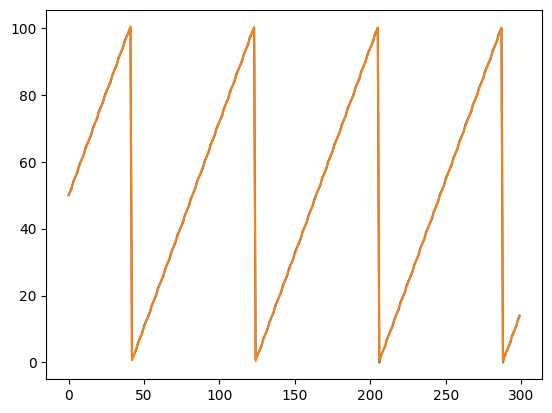

In [78]:
time = np.array([t for t in range(len(grid))])
plt.plot(time, np.argmax(grid, axis=1))
plt.plot(time, (50 + v*time)%len(x_coordinates))
plt.show()

In [60]:
sim_wave_vel = (np.argmax(grid, axis = 1)[-1] + 101*4 - 50)/(len(grid) - 1)
print(sim_wave_vel)

1.1872909698996656


In [91]:
from video_creator_1d import create_video

create_video(grid, "1D_gaussian_constvel_advec_rancic.mp4")